# General requirements for the assignment

- Make appropriate comments to your code
- Use Markdown cells to provide your answers (when applicable)
- Add your code when there is the comment "YOUR CODE HERE".
- Stick to Pep8 standard as much as possible for your coding
- Tag the commit as *Final submission of Assignment 2*
- Submit through GitHub
- Provide your GitHub url to the Ipython notebook as the submisison for Brightspace assignment 2
- Post (interesting) errors in the course Github's issue page

# Assignment Intro

In this assignment, you will be asked to implement some functionalities on the dataset that you worked with in the first assignment.

### DEADLINE FOR THIS ASSIGNMENT IS 01 OCTOBER 2021 BEFORE 23:59

<hr />

## Import libraries
Update this list as you go along the assigment

In [43]:
# YOUR CODE HERE
# import libraries
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
from datetime import datetime

## Preparing data

### 1. Read 2020 and 2021 data for your selected country. You only need provincial data for this assignment. Print the first 5 lines of data

In [5]:
# YOUR CODE HERE
df_2020 = pd.read_csv('/Users/mengxinran/Downloads/2020_NL_Region_Mobility_Report.csv')
df_2021 = pd.read_csv('/Users/mengxinran/Downloads/2021_NL_Region_Mobility_Report.csv')
df = pd.concat([df_2020, df_2021])

matrix = pd.isna(df) #get the True&False matrix
df_province = df[(matrix['country_region']==False)&(matrix['sub_region_1']== False)&(matrix['sub_region_2']== True)]
df_province = df_province.reset_index(drop = True)
print(df_province.head)

<bound method NDFrame.head of      country_region_code country_region sub_region_1 sub_region_2  metro_area  \
0                     NL    Netherlands      Drenthe          NaN         NaN   
1                     NL    Netherlands      Drenthe          NaN         NaN   
2                     NL    Netherlands      Drenthe          NaN         NaN   
3                     NL    Netherlands      Drenthe          NaN         NaN   
4                     NL    Netherlands      Drenthe          NaN         NaN   
...                  ...            ...          ...          ...         ...   
6859                  NL    Netherlands      Zeeland          NaN         NaN   
6860                  NL    Netherlands      Zeeland          NaN         NaN   
6861                  NL    Netherlands      Zeeland          NaN         NaN   
6862                  NL    Netherlands      Zeeland          NaN         NaN   
6863                  NL    Netherlands      Zeeland          NaN         NaN  

### 2. For this assignment, select and extract the data for a single province. Name the dataframe for this subset `df_province_selected`

In [17]:
# YOUR CODE HERE
# fiter the provice date firstly
a = df_province.groupby('sub_region_1')
# choose Utrecht as the province
df_province_selected = a.get_group('Utrecht')

The following show an example from extracting the data for South Holland, the Netherlands

In [18]:
df_province_selected.head()


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
3210,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-15,8.0,0.0,3.0,9.0,-1.0,0.0
3211,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-16,-5.0,-10.0,-22.0,14.0,-3.0,1.0
3212,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-17,2.0,-1.0,2.0,3.0,1.0,0.0
3213,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-18,4.0,3.0,12.0,0.0,2.0,0.0
3214,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-19,6.0,-1.0,12.0,-2.0,1.0,0.0


### 3. Aggregated measurements

#### Write a function with the following arguments as the input:
- a dataset as a dataframe object
- list of attributes (refers to df.columns)
- a year
- one of the following statistic measurements: mean/median/max/min. You can use [enum](https://docs.python.org/3/library/enum.html) for this argument.
  
The function will then return the required statistic on some attributes of the data for a particular year.

In [19]:
# modify the following line to make the function calculate the 'mean' when the statistic argument is empty.
def calculate_statistic(data, attributes, year, statistic):
    
    #firstly make the year can be recognized
    dt = data["date"]
    dt = dt.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
    data["only_year"] = dt.map(lambda x: x.year)
    
    #Filter data by criteria
    spe_data1 = data[data["only_year"] == year]
    spe_data = spe_data1[attributes]
    
    if statistic == 'mean':
        result = spe_data.mean()
    elif statistic == 'median':
        result = spe_data.median()
    elif statistic == 'max':
        result = spe_data.max()
    elif statistic == 'min':
        result = spe_data.min()
    #this 'else' is for calculating the 'mean' when the statistic argument is empty
    else:
        result = spe_data.mean()
        
    
    return result
    
    """calculate a statistic

    Args:
        data (Pandas DataFrame): dataset
        attributes (list): list of attributes
        year (int): either 2020 or 2021
        statistic (str): the statistic to calculate: mean/median/max/min
    """
    # YOUR CODE HERE
    pass


#### Call your calculate_statistic function and print the results with three different input arguments

In [20]:
# YOUR CODE HERE
# Here I define the input year is 2021 and the attribute to be retail_and_recreation_percent_change_from_baseline
calculate_statistic(df_province_selected, 'retail_and_recreation_percent_change_from_baseline', 2021, 'mean')

<ipython-input-19-f40545db48cd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["only_year"] = dt.map(lambda x: x.year)


-22.89641434262948

## Activity changes

Since there are quite some noises when looking at daily data, it is easier to observe data on a larger aggregation level. The following code derives 7-day averages for the provice data. We also prepare a plot to visualise it for you.

In [24]:
#change the date format firstly
df_province_selected['date'] = pd.to_datetime(df_province_selected['date'])
df_province_agg = df_province_selected.resample('7D', on='date').mean()
df_province_agg.reset_index(inplace=True)
df_province_agg.head()

<ipython-input-24-3d1378534e0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_province_selected['date'] = pd.to_datetime(df_province_selected['date'])


,date,metro_area,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,only_year
0,2020-02-15,NaN,NaN,3.285714,-1.714286,1.285714,4.142857,-0.571429,0.285714,2020.0
1,2020-02-22,NaN,NaN,3.428571,-7.714286,-14.857143,-4.571429,-15.857143,1.714286,2020.0
2,2020-02-29,NaN,NaN,1.000000,-1.142857,2.857143,-0.857143,0.142857,0.285714,2020.0
3,2020-03-07,NaN,NaN,-2.714286,3.857143,2.000000,-10.000000,-3.000000,2.428571,2020.0
4,2020-03-14,NaN,NaN,-29.428571,6.428571,14.571429,-59.285714,-39.428571,15.428571,2020.0


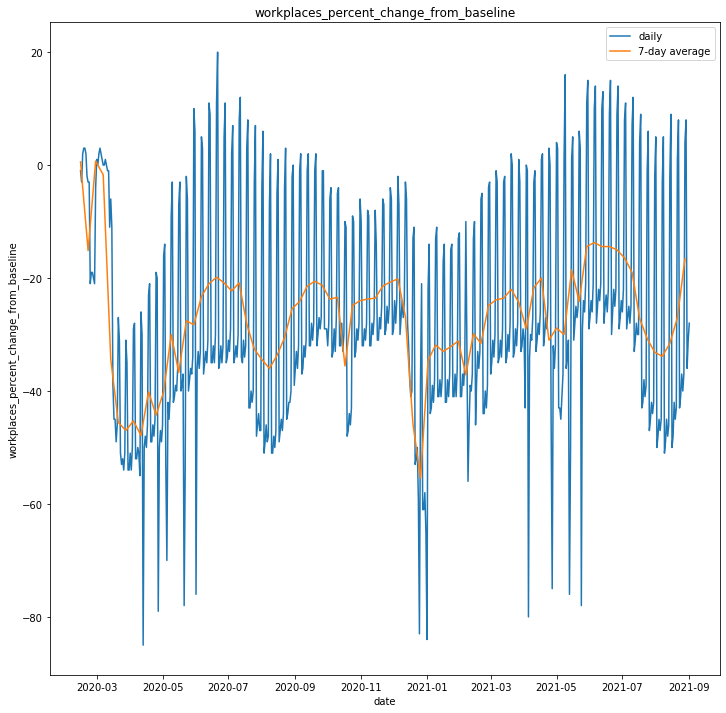

In [107]:
#Code to visualise the raw data and sampled data
fig, ax = plt.subplots(figsize=(12,12))
ax.set_title('workplaces_percent_change_from_baseline')
sns.lineplot(x='date', y='workplaces_percent_change_from_baseline', data=df_a_province, label='daily', ax=ax)
sns.lineplot(data=df_province_agg, x='date', y='workplaces_percent_change_from_baseline', label='7-day average', ax=ax)
plt.show()

## Identifying peaks

Let's focus on the 7-day averaged data. This averaged time series data shows how many times workplace changes reach peaks. Your task is to identify these moments. 

### 4. Identify peaks with personal code

Complete the function below. Your function should return (at least) a list of indexes where there are peaks in data.

In [30]:
def my_find_peaks(data, activity, **kwargs):
    dic = []
    #select the corresponding data
    act_data = data[activity]
    act_data = act_data.reset_index(drop = True)
    #calculate the number of iterations
    iteration = act_data.shape[0] -1
    
    #find the peak value by compare each value with the left and right one 
    for i in range(0,iteration):
        if act_data.iloc[i] > act_data.iloc[i-1] and act_data.iloc[i]>act_data.iloc[i+1]:
            dic.append(i)
        
    return dic
    """[summary]

    Args:
        data (dataframe): dataframe with at least two attribute columns: date and the given activity
        activity (str): one of the (six) available mobility activities
        kwargs: a dictionary of arguments. Use these to customise your function on finding peaks
    """
    # YOUR CODE HERE

In [31]:
activity = 'grocery_and_pharmacy_percent_change_from_baseline'
max_ind = my_find_peaks(
    df_province_agg, 
    activity
)
max_ind

[4,
 7,
 14,
 18,
 21,
 28,
 32,
 34,
 36,
 38,
 40,
 43,
 47,
 50,
 53,
 58,
 61,
 65,
 67,
 73,
 80]

In [38]:
# Assign the data related to the max_ind to df_max
df_max = df_province_agg.iloc[max_ind]
# YOUR CODE HERE


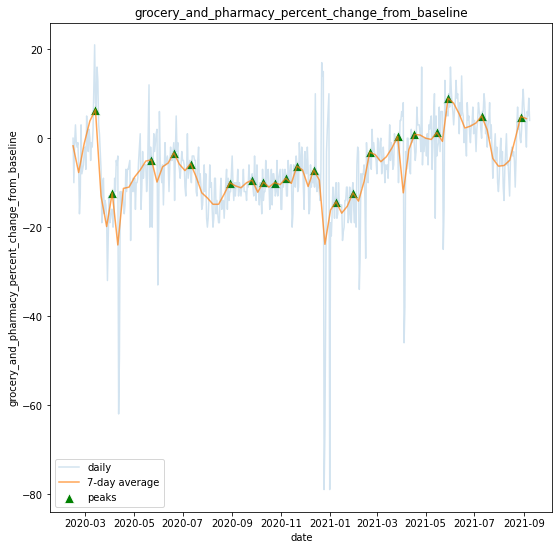

In [39]:
#Code to visualise the raw data, sampled data and the peaks
# create a figure and an axis to plot
fig, ax = plt.subplots(figsize=(9,9))
# set the title of the plot
ax.set_title(activity)
# plot the daily values
sns.lineplot(x='date', y=activity, data=df_province_selected, label='daily', ax=ax, alpha=0.2)
# plot the 7-day average
sns.lineplot(data=df_province_agg, x='date', y=activity, label='7-day average', ax=ax, alpha=0.7)
# label the peaks
sns.scatterplot(x='date', y=activity, data=df_max, label='peaks', ax=ax, marker='^', color='g', s=100)
plt.show()

### 5. Identify peaks using library scipy - [find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html)

In [50]:
# YOUR CODE HERE
activity = 'grocery_and_pharmacy_percent_change_from_baseline'
max_ind = find_peaks(df_province_agg[activity])
#input only the ndarray of peak data
max_ind[0]

array([ 4,  7, 14, 18, 21, 28, 32, 34, 36, 38, 40, 43, 47, 50, 53, 58, 61,
       65, 67, 73, 80])

### 6. Identify valleys

You have identified the peaks in the data above using both your personal approach and the scipy library. Here, you can also identify the valleys (or troughs) using either of these approaches.

In [51]:
# YOUR CODE HERE
# change judge conditions in the funtion to find the valley
def my_find_valleys(data, activity, **kwargs):
    dic = []
    #select the corresponding data
    act_data = data[activity]
    act_data = act_data.reset_index(drop = True)
    #calculate the number of iterations
    iteration = act_data.shape[0] -1
    
    #find the peak value by compare each value with the left and right one 
    for i in range(0,iteration):
        if act_data.iloc[i] < act_data.iloc[i-1] and act_data.iloc[i]<act_data.iloc[i+1]:
            dic.append(i)
        
    return dic

activity = 'grocery_and_pharmacy_percent_change_from_baseline'
min_ind = my_find_valleys(
    df_province_agg, 
    activity
)
min_ind


[1, 6, 8, 15, 20, 30, 33, 35, 37, 39, 42, 45, 48, 51, 55, 59, 64, 66, 70, 76]

### 7. Identify all the peaks (and potentially valleys) for all the activities in the data. Print out the peaks for each of the activities. 

If you are brave, you can make use of the plotting piece of code that is provided above to plot the results.

Peaks for retail_and_recreation_percent_change_from_baseline :
 [1, 7, 11, 21, 28, 30, 40, 47, 50, 53, 58, 64, 68, 72, 77, 79]
Peaks for grocery_and_pharmacy_percent_change_from_baseline :
 [4, 7, 14, 18, 21, 28, 32, 34, 36, 38, 40, 43, 47, 50, 53, 58, 61, 65, 67, 73, 80]
Peaks for parks_percent_change_from_baseline :
 [2, 5, 7, 9, 11, 13, 15, 18, 22, 30, 35, 38, 40, 43, 47, 51, 53, 58, 62, 64, 67, 72, 74, 77, 79]
Peaks for transit_stations_percent_change_from_baseline :
 [0, 2, 7, 21, 30, 36, 40, 47, 50, 53, 58, 61, 65, 67, 69, 72]
Peaks for workplaces_percent_change_from_baseline :
 [0, 2, 7, 9, 12, 14, 18, 21, 31, 41, 47, 50, 52, 57, 61, 65, 68]
Peaks for residential_percent_change_from_baseline :
 [1, 6, 8, 10, 23, 25, 27, 35, 38, 41, 45, 49, 51, 55, 59, 62, 66, 70, 73, 76]


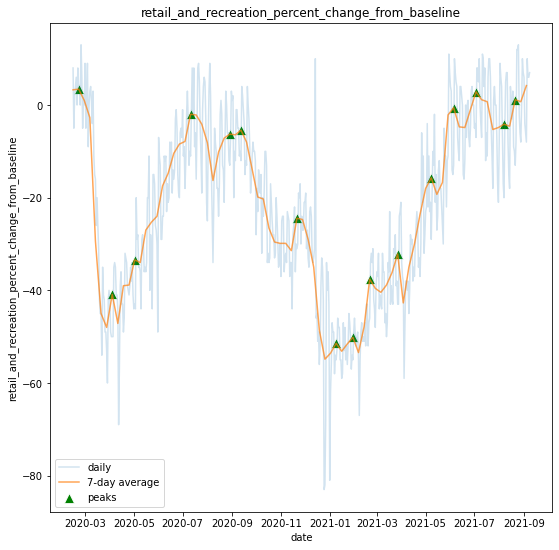

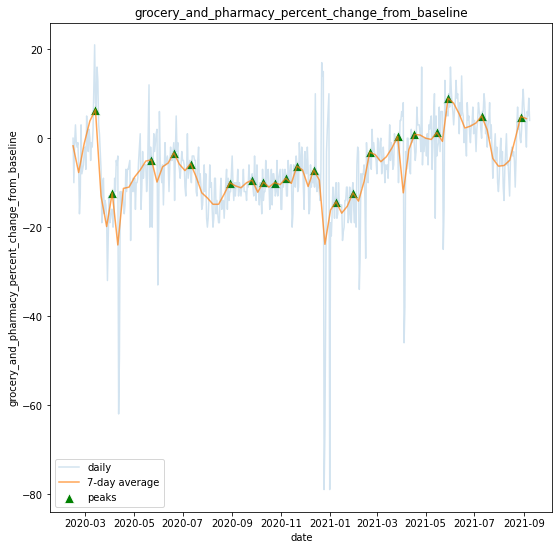

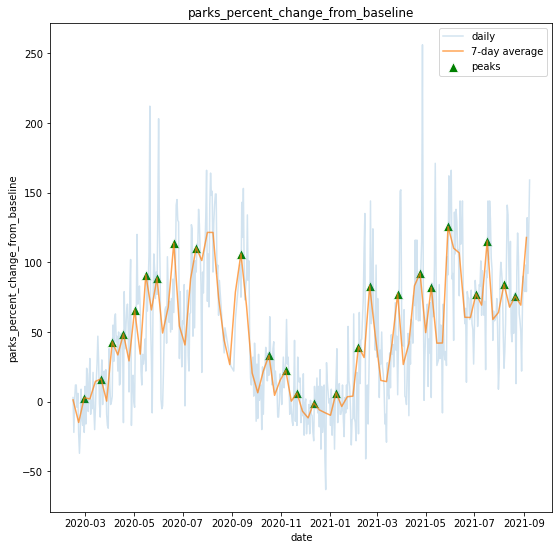

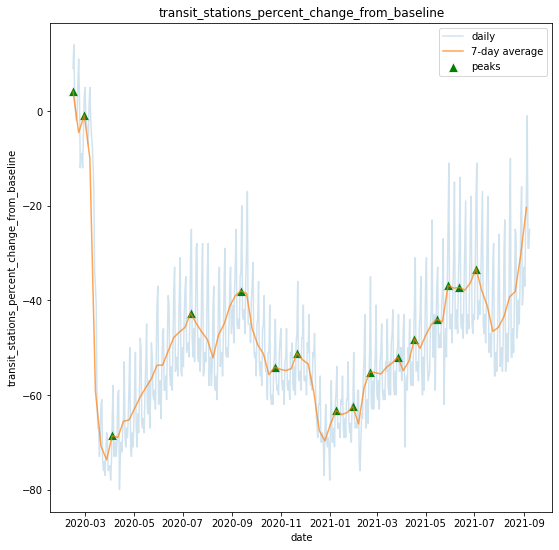

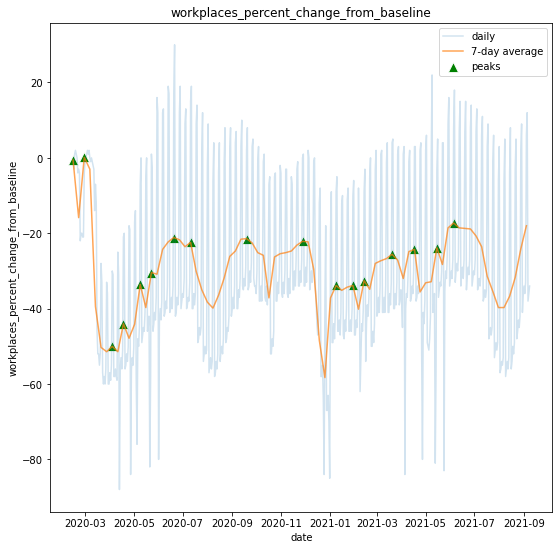

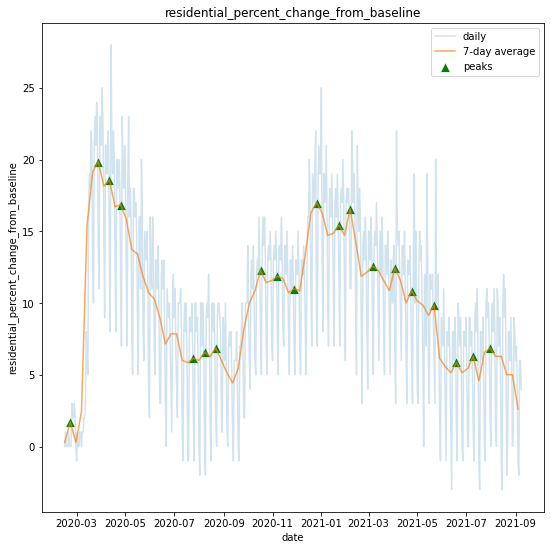

In [70]:
# YOUR CODE HERE

act = [
    'retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline',
    'parks_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline',
    'workplaces_percent_change_from_baseline',
    'residential_percent_change_from_baseline'
]
#creat lists for storing values
peaks = []
valleys = []

for i in range(0,6):
    peaks.append(my_find_peaks(df_province_agg,act[i]))
    valleys.append(my_find_valleys(df_province_agg,act[i]))
    print('Peaks for',act[i],':\n',peaks[i])

    
#here I  use the given code to plot the result for every activity(peaks)
for i in range(0,6):
    df_max = df_province_agg.iloc[peaks[i]]
    fig, ax = plt.subplots(figsize=(9,9))
    activity = act[i]
    ax.set_title(activity)
    sns.lineplot(x='date', y=activity, data=df_province_selected, label='daily', ax=ax, alpha=0.2)
    sns.lineplot(data=df_province_agg, x='date', y=activity, label='7-day average', ax=ax, alpha=0.7)
    sns.scatterplot(x='date', y=activity, data=df_max, label='peaks', ax=ax, marker='^', color='g', s=100)
    plt.show()

### 8. Is there any common dates (or periods) among these peaks (and/or valleys) of different activities

*Food for thoughts*:
- One of the most naive way to find the overlapping dates is to look for common indexes (or dates) of the peaks/valleys
- A more general solution is to have a tolerance level between the days. For example, Sep 19 and Sep 20 can be considered matched (or overlapped) if the tolerance level is at least one day.

In [81]:
# YOUR CODE HERE
# use set to find the 
set1 = set(peaks[0])
set2 = set(peaks[1])
set3 = set(peaks[2])
set4 = set(peaks[3])
set5 = set(peaks[4])
set6 = set(peaks[5])
# find common days for different activities
print(set1&set2&set3&set4&set5&set6)
print(set1&set2&set3&set4&set5)

day = set1&set2&set3&set4&set5
day_list = list(day)
df_max = df_province_agg.iloc[day_list]
print('The common days of the first five activities are:\n',df_max['date'])

# According to the result that for the first five activities, they own two common peak days,
# which are 2021-01-09 and 2020-04-04, however for the whole six activities there are no common 
# dates.

set()
{47, 7}
The common days of the first five activities are:
 47   2021-01-09
7    2020-04-04
Name: date, dtype: datetime64[ns]


## OPTIONAL

Append population/density for provinces/municipalities to the dataframe. The data for Netherlands is available [here](https://www.cbs.nl/en-gb/news/2021/30/population-growth-picks-up-again)


In [ ]:
# YOUR CODE HERE
